<a href="https://colab.research.google.com/github/amandapaura/machine_learning/blob/main/Social_Engineering_Whote_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# White Paper: Classificação de Mensagens de Engenharia Social Usando Embeddings, LSTM e Regressão Logística

## **Introdução**

A engenharia social é uma das formas mais eficazes de ataque cibernético, pois explora vulnerabilidades humanas em vez de falhas tecnológicas. Detectar essas mensagens em meio a grandes volumes de comunicações cotidianas representa um desafio significativo, principalmente devido ao desbalanceamento natural dos dados: a maioria das mensagens são lícitas, e apenas uma pequena fração representa tentativas de fraude ou manipulação.

Problemas de classificação com dados desbalanceados apresentam desafios importantes:

*   Modelos tendem a ser enviesados para a classe majoritária.
*   Métricas como acurácia se tornam enganosas.
*   Detectar corretamente a minoria (ataques) é crítico para o negócio.

Neste trabalho, propomos duas abordagens para mitigar esses desafios: uma baseada em redes neurais recorrentes (LSTM) e outra clássica com Regressão Logística, ambas combinadas com vetorizadores baseados em embeddings.

## **Preparo dos Dados e Vetorização**

### Tokenização e Padding

Cada mensagem textual foi convertida em uma sequência de inteiros, onde cada inteiro representa um token (palavra ou subpalavra). Em seguida, foi aplicado padding para garantir que todas as sequências tivessem o mesmo comprimento.


### Embedding

A camada de embedding projeta os tokens em um espaço vetorial d-dimensional:

#### Embeding: ℕ → ℝᵈ
#### sim ($\vec{v}$ᵢ, $\vec{v}$ⱼ) = cos(θ) = $\frac{\vec{v}ᵢ ⋅ \vec{v}ⱼ}{|\vec{v}ᵢ| ⋅ |\vec{v}ⱼ|}$

Dado um vocabulário de tamanho 𝑉 e dimensão de embedding 𝐷, a matriz de embedding é:

#### 𝐄 ϵ ℝ ⱽˣᵈ

Essa matriz é treinada para minimizar o erro do modelo final. O embedding é fundamental para representar similaridades semânticas entre palavras:

## **Balanceamento dos Dados**

Foram aplicadas duas técnicas para tratar o desbalanceamento:

* Random OverSampling: duplica exemplos reais da minoria.
* SMOTE (Synthetic Minority Over-sampling Technique): cria vetores sintéticos interpolando entre amostras da minoria.

### Modelo 1: LSTM (Long Short-Term Memory)

As LSTM são redes neurais recorrentes capazes de aprender padrões temporais de longo prazo. A arquitetura contém três portas:

* Porta de esquecimento $f_t$

* Porta de entrada $i_t$

* Porta de saída $o_t$

Com as seguintes equações:

####  $f_t$ = σ ( 𝑊$_f$ [ 𝐡$_t$$_-$$_1$ , 𝑥$_t$ ] + 𝒃$_f$ )

#### $i_t$ = σ ( 𝑊$_i$ [ 𝐡$_t$$_-$$_1$ , 𝑥$_t$ ] + 𝒃$_i$ )

#### $\tilde{C}_t$ = tanh ( 𝑊$_c$ [ 𝐡$_t$$_-$$_1$ , 𝑥$_t$ ] + 𝒃$_c$ )

#### $C_t$ = $f_t$ · $C_t$$_-$$_1$ + $i_t$ · $\tilde{C}_t$

#### $o_t$ = σ ( 𝑊$_o$ [ 𝐡$_t$$_-$$_1$ , 𝑥$_t$ ] + 𝒃$_o$ )

#### $h_t$ = $o_t$ · tanh ( $C_t$ )


O vetor final $h_T$ é passado para uma camada densa com ativação sigmoide:

#### $\hat{y}$ = σ ( $\vec{w}$ ᵀ $\vec{x}$ + 𝒃 )


### Resultados com LSTM

* KS Test: 0.96875

* p-valor: 5.64e-44

#### Resultado com Random Oversample

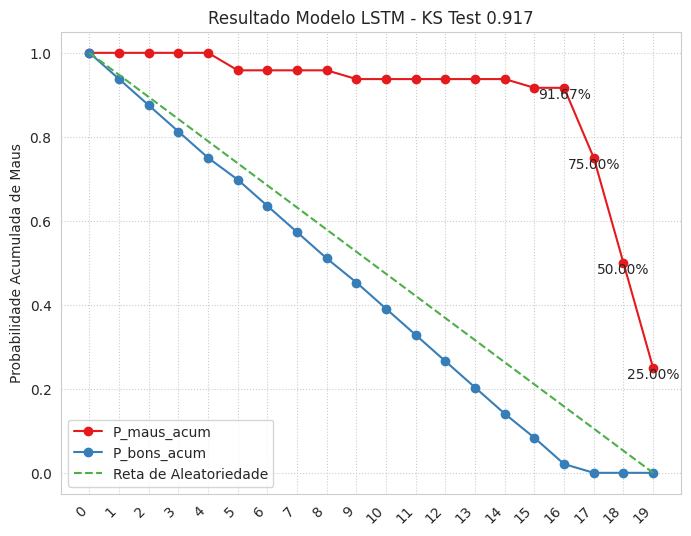


#### Resultado com SMOTE

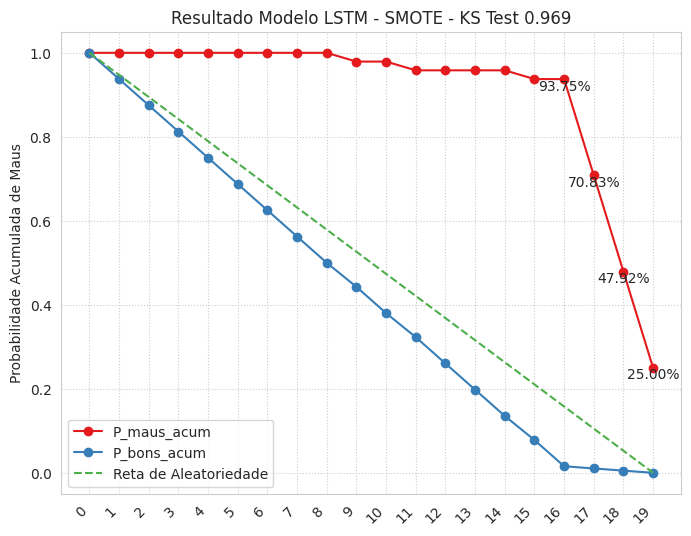

### Modelo 2: Regressão Logística

A regressão logística é uma técnica clássica de classificação binária. Considerando um vetor de entrada $\vec{x} \in \mathbb{R}^d$ (obtido a partir do embedding médio de uma frase), temos:

#### 𝓛 = $-\frac{1}{𝐍}$ $\sum_{i=1}^{N} [ y_i \log \hat{y}_i + ( 1 - y_i ) log(1-\hat{y}_i )]$

#### Resultados com Regressão Logística

* KS Test: 0.89583

* p-valor: 3.46e-34

#### Resultado Random Oversample

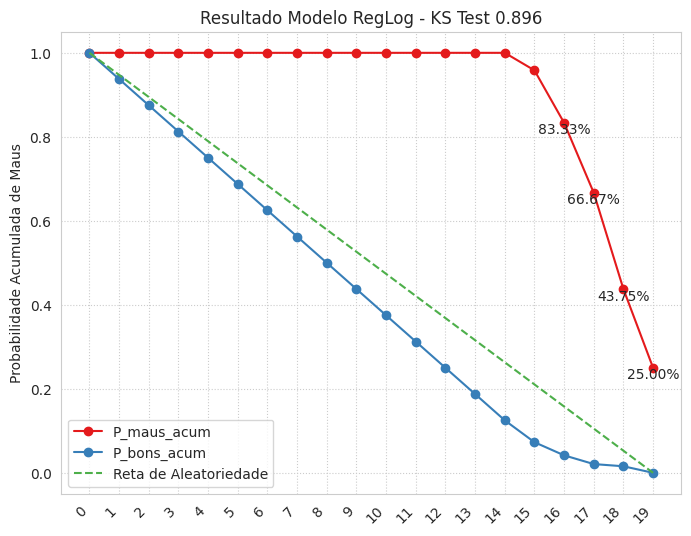

#### Resultado com SMOTE

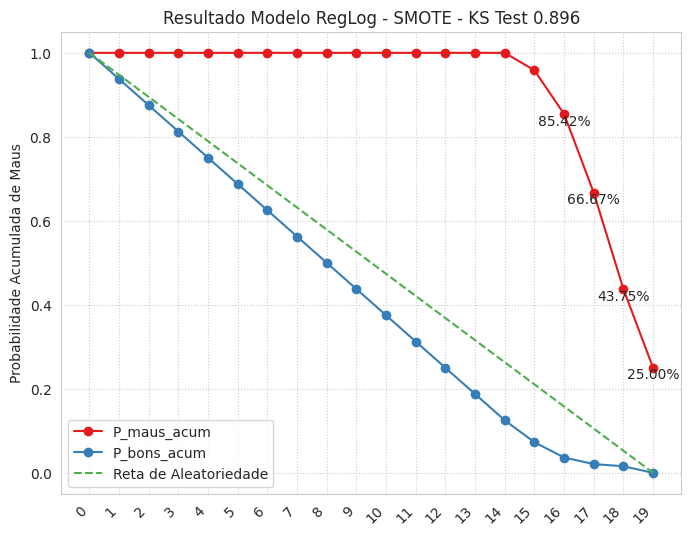



##### Resultado do Score de Regressão Logística com Smote em Faixas

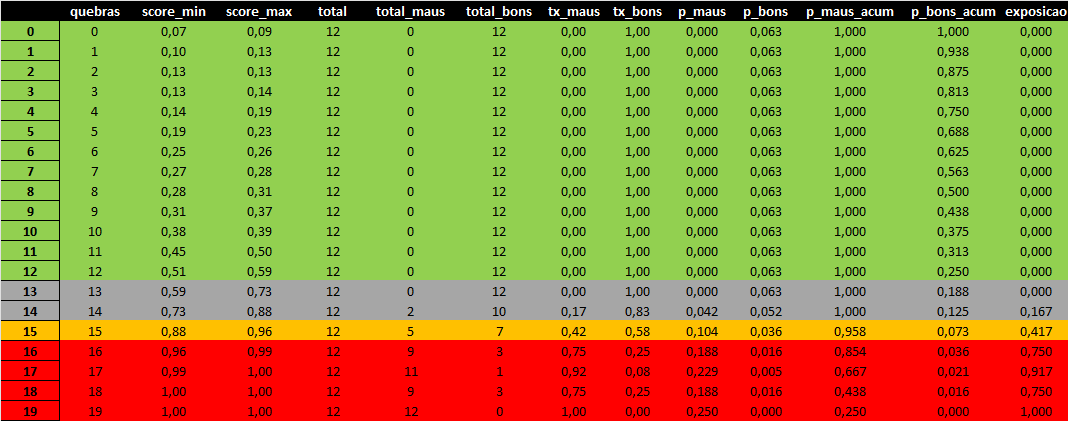

### Segmentação por Scores

As saídas de predict_proba dos modelos foram utilizadas para criar faixas de classificação de risco:

* Faixa de Score 100 - 96 (em vermelho) - Zona de Risco Alta - Altamente Suspeito

* Faixa de Score 88 - 95 (em laranja) - Zona de Risco - Suspeito

* Faixa de Score 59 - 87 (em cinza) - Zona Cinzenta - Necessário Revisão

* Faixa de Score 0 - 58 (em verde) - Zona de Confiança - Não suspeito

### Comparativo Final

Embora o modelo LSTM tenha apresentado um valor de KS superior (**0.9687**) em comparação com a Regressão Logística (**0.8958**), uma análise mais detalhada da distribuição de scores revelou um comportamento importante:

* LSTM: apresentou quebras abruptas nas faixas de score. Em determinadas zonas, a probabilidade prevista variou de 0.0074 para 0.98 em uma única faixa, indicando um comportamento instável na calibragem do modelo.

* Regressão Logística: teve um score mais linear e suavemente separado, com quebras constantes e previsíveis entre faixas de 5 a 12 pontos no máximo, o que transmite maior confiança na previsibilidade do modelo.

Apesar de o KS ser ligeiramente inferior, a Regressão Logística apresentou uma separação mais coerente entre classes, com comportamento de score mais interpretável, o que pode ser preferível em ambientes de produção que exigem transparência e rastreabilidade.

### Sugestões de Trabalhos Futuros

* Experimentar embeddings pré-treinados como Word2Vec, GloVe ou BERT.

* Avaliar modelos transformer (ex: BERT + classificação).

* Implementar sistema de feedback humano para realimentação do classificador.

* Aumentar a base de dados com dados reais ou simulados.